### 过去 3 年上市公司的年平均收益率
若采用单利计算，则公式如下：
AvgEarningRate = (ClosePrice/OpenPrice) /N -1
若采用复利计算，则公司如下：
AvgEarningRate = -1
其中，AvgEarningRate 是 N 年的年平均收益率，N 为年数，OpenPrice 为 N 年首个交易
日的开盘价，ClosePrice 为 N 年最后一个交易日的收盘价。注意：一般开盘价和收盘价都是
前复权或后复权的数据。

In [12]:
import baostock as bs
import pandas as pd
import matplotlib.pyplot as plt
import math


In [13]:
def get_closeprice(code):


     #### 获取沪深 A 股历史 K 线数据 ####
     # 详细指标参数，参见“历史行情指标参数”章节
    rs_open = bs.query_history_k_data(code,"open",start_date='2019-07-01', end_date='2019-07-01', frequency="d", adjustflag="1")  #获取三年
    data_list = []
    while (rs_open.error_code == '0') & rs_open.next():
     # 获取一条记录，将记录合并在一起
        data_list.append(rs_open.get_row_data())
    result_open = pd.DataFrame(data_list, columns=rs_open.fields,index=[code])

    rs_close = bs.query_history_k_data(code,"close",start_date='2022-7-01', end_date='2022-7-01', frequency="d", adjustflag="1")
    data_list = []
    while (rs_close.error_code == '0') & rs_close.next():
         # 获取一条记录，将记录合并在一起
        data_list.append(rs_close.get_row_data())
    result_close = pd.DataFrame(data_list, columns=rs_close.fields,index=[code])

    result = result_open.join(result_close)
    return result

# bs.login()
# get=get_closeprice('sh.600352')
# bs.logout()
# get,type(get)

In [2]:
lg = bs.login()

     # 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond error_msg:'+lg.error_msg)

     # 获取全部证券基本资料
rs = bs.query_all_stock('2017-1-3')
# rs = bs.query_stock_basic()
bs.logout()
rs

login success!
login respond error_code:0
login respond error_msg:success
logout success!


In [7]:
result = pd.DataFrame()
result = get
result

,open,close
sh.600352,113.8273110000,139.5410216000


In [8]:
result = result.append(get)
result,result.empty

(                     open           close
 sh.600352  113.8273110000  139.5410216000
 sh.600352  113.8273110000  139.5410216000,
 False)

In [3]:
result = pd.DataFrame()
lg = bs.login()
while (rs.error_code == '0') & rs.next():
        # 获取一条记录，将记录合并在一起
    code = rs.get_row_data()[0]
#     print(code)
    df = get_closeprice(code)
    print(df)
    if result.empty:
        result = df
    else:
        result = result.append(df)
result
bs.logout()

login success!


NameError: name 'get_closeprice' is not defined

In [4]:
result = result[result['open'] != '']
result['open'] = result['open'].astype(float)
result['close'] = result['close'].astype(float)
result['avgEarningRate'] = (result['close']/result['open']).apply(lambda x: math.pow(x,1/3)-1)
result = result.sort_values(by=['avgEarningRate'],ascending=False)
# result.to_csv("Data/Avg_Earning_Rate_data.csv", encoding="gbk", index=False)
result[:10]['avgEarningRate'].plot(title='Avg Earning Rate',kind='bar')
plt.show()
result[:10]

KeyError: 'open'

In [17]:
def compute_Avg_EarningRate():

     # 登陆系统
    lg = bs.login()

     # 显示登陆返回信息
    print('login respond error_code:'+lg.error_code)
    print('login respond error_msg:'+lg.error_msg)

     # 获取全部证券基本资料
#     rs = bs.query_stock_basic()
    rs = bs.query_all_stock('2022-7-1')
    
    result = pd.DataFrame()
    while (rs.error_code == '0') & rs.next():
        # 获取一条记录，将记录合并在一起
        code = rs.get_row_data()[0]
        df = get_closeprice(code)
        if result.empty:
            result = df
        else:
            result = result.append(df)
    result = result[result['open'] != '']
    result['open'] = result['open'].astype(float)
    result['close'] = result['close'].astype(float)
    result['avgEarningRate'] = (result['close']/result['open']).apply(lambda x: math.pow(x,1/3)-1)
    result = result.sort_values(by=['avgEarningRate'],ascending=False)
    result.to_csv("Data/Avg_Earning_Rate_data_5Y.csv", encoding="gbk", index=True)
    result[:20]['avgEarningRate'].plot(title='Avg Earning Rate',kind='bar')
    plt.show()
     # 登出系统
    bs.logout()


login success!
login respond error_code:0
login respond error_msg:success


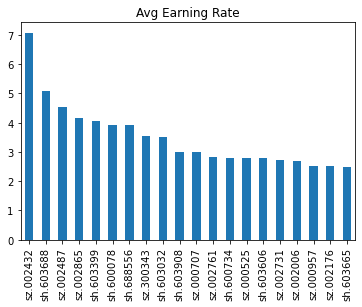

logout success!


In [18]:
if __name__ == '__main__':
    compute_Avg_EarningRate()


logout success!
